In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
embarked_dict = {"Iris-setosa": 3, "Iris-versicolor": 2, "Iris-virginica": 1}
data["Species"].replace(embarked_dict, inplace=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [28]:
X = data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = data["Species"]
x_train = data[["SepalLengthCm", "SepalWidthCm"]]

In [29]:
X = X.to_numpy()
Y = Y.to_numpy()
x_train = x_train.to_numpy()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [11]:
#using optimal value of N = 15
# knn_params = {
#     "n_neighbors": 15,
#     "weights": ["uniform"],
#     "metric": ["euclidean"],
#     "leaf_size": 1
# }

In [12]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = "uniform", metric = "euclidean", leaf_size=1)

In [13]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=15)

In [14]:
knn.score(X_test, Y_test)

0.9111111111111111

In [37]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import seaborn as sns

In [19]:
cmap_light = ListedColormap(["orange", "yellow", "skyblue"])
cmap_bold = ["red", "black", "blue"]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, Y, test_size = 0.3)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = "uniform", metric = "euclidean", leaf_size=1)

In [34]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=15)

In [35]:
knn.score(X_test, Y_test)

0.7555555555555555

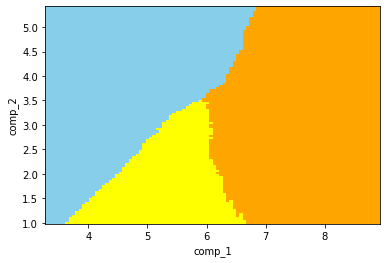

In [40]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        knn,
        x_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="comp_1",
        ylabel="comp_2",
        shading="auto",
)
plt.show()